## Introduction
In this task we will transform the news articles  dataset to suit the agreed format. 

In [1]:
""" Warning : Don't forget to remove your github username and token after running this cell """
 
import pandas as pd
import requests
import io
 
# Username of your GitHub account

username = ''

# Personal Access Token (PAO) from your GitHub account

token = ''
 
# Creates a re-usable session object with your creds in-built
 
github_session = requests.Session()
github_session.auth = (username, token)

In [2]:
#Loading the file so we can be able to clean it

url = 'https://raw.githubusercontent.com/OmdenaAI/WeoWater/main/task-4-scraping-newspapers/labelled_data/cleaned_merged_labbeled_newspaper_data.csv'
download = github_session.get(url).content #Reading and downloading the data

data = pd.read_csv(io.StringIO(download.decode('utf-8'))) #Converting the data into a pd dataframe
data.shape

(4750, 11)

In [3]:
data.head(5)

,Unnamed: 0,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,category,country,data source
0,438,DR-2014-000109-CHN,Worst drought in 63 years hits Liaoning provin...,https://www.scmp.com/news/china/article/157349...,Liaoning averaged 90mm across the province in ...,2014-08-14 07:00:00+00:00,https://cdn1.i-scmp.com/sites/default/files/st...,"['averaged', 'liaoning', 'hits', 'dry', 'droug...",drought,China,newspaper
1,439,DR-2014-000109-CHN,"In Time Of Drought, U.S. West's Alfalfa Export...",https://www.npr.org/2014/08/12/339753108/in-ti...,"In Time Of Drought, U.S. West's Alfalfa Export...",2014-08-12 07:00:00+00:00,https://media.npr.org/include/images/facebook-...,"['criticized', 'river', 'drought', 'farmers', ...",drought,China,newspaper
2,440,DR-2014-000109-CHN,"More Chinese on the Coast, Less Fish in the Se...",https://www.scientificamerican.com/article/mor...,China's booming economic growth is helping to ...,2014-08-08 07:00:00+00:00,http://www.scientificamerican.com/themes/respo...,"['bertness', 'chinese', 'research', 'sea', 'ec...",none,China,newspaper
3,441,DR-2014-000109-CHN,Climate change and drought in ancient times - ...,https://www.sciencedaily.com/releases/2014/08/...,The influence of climate on agriculture is bel...,2014-08-11 07:00:00+00:00,https://www.sciencedaily.com/images/scidaily-i...,"['climate', 'drought', 'ancient', 'agriculture...",drought,China,newspaper
4,442,DR-2014-000109-CHN,Drought-Resistant Rice Sows Wealth in India - ...,https://www.wsj.com/articles/drought-resistant...,NaN,2014-08-04 07:00:00+00:00,NaN,[],none,China,newspaper


In [4]:
#Add the language column 
data['language'] = 'English'

In [5]:
data['data source'] = data['data source'].replace({'newspaper':'news article'}) 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        4750 non-null   int64 
 1   event_id          4750 non-null   object
 2   article_title     4750 non-null   object
 3   article_link      4750 non-null   object
 4   article_content   4359 non-null   object
 5   publishing_date   4750 non-null   object
 6   article_image     4303 non-null   object
 7   article_keywords  4750 non-null   object
 8   category          4346 non-null   object
 9   country           4750 non-null   object
 10  data source       4750 non-null   object
 11  language          4750 non-null   object
dtypes: int64(1), object(11)
memory usage: 445.4+ KB


In [7]:
#transform the data to suit the data format
df_transformed = data.rename(columns={'event_id': 'Id',
                                    'article_title': 'title',
                                    'article_link': 'source URL',
                                    'article_content':'body',
                                    'publishing_date':'time',
                                    'article_keywords':'keywords'})
df_transformed.drop(columns=['Unnamed: 0', 'article_image'],
                    inplace=True)

df_transformed.dropna(inplace=True)
df_transformed.drop_duplicates('body',inplace=True)

df_transformed.shape

(2496, 10)

In [8]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2496 entries, 0 to 4749
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           2496 non-null   object
 1   title        2496 non-null   object
 2   source URL   2496 non-null   object
 3   body         2496 non-null   object
 4   time         2496 non-null   object
 5   keywords     2496 non-null   object
 6   category     2496 non-null   object
 7   country      2496 non-null   object
 8   data source  2496 non-null   object
 9   language     2496 non-null   object
dtypes: object(10)
memory usage: 214.5+ KB


In [9]:
#converting publishing date from object to datetime
df_transformed['time'] = pd.to_datetime(df_transformed['time'], errors='coerce',utc=True)
df_transformed = df_transformed.dropna(subset=['time'])

df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2496 entries, 0 to 4749
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Id           2496 non-null   object             
 1   title        2496 non-null   object             
 2   source URL   2496 non-null   object             
 3   body         2496 non-null   object             
 4   time         2496 non-null   datetime64[ns, UTC]
 5   keywords     2496 non-null   object             
 6   category     2496 non-null   object             
 7   country      2496 non-null   object             
 8   data source  2496 non-null   object             
 9   language     2496 non-null   object             
dtypes: datetime64[ns, UTC](1), object(9)
memory usage: 214.5+ KB


In [10]:
df = df_transformed[df_transformed.Id == 'FL-2017-000067-BRA']
df['country'].value_counts()

Kenya     93
Brazil    31
Name: country, dtype: int64

In [11]:
df = df[df.country != 'Brazil']
df.head()

,Id,title,source URL,body,time,keywords,category,country,data source,language
2250,FL-2017-000067-BRA,Brazil's pandemic-weary Manaus flooded by risi...,https://www.reuters.com/world/americas/brazils...,Heavy rains in the Amazon rainforest have caus...,2021-05-18 08:00:00+00:00,"['amazon', 'wooden', 'rivers', 'water', 'level...",flood,Kenya,news article,English
2251,FL-2017-000067-BRA,'Amazon Venice' struggles to stay above water ...,https://www.dailysabah.com/gallery/amazon-veni...,The rivers have been swelling for weeks in Bra...,2021-05-15 10:44:00+00:00,"['amazon', 'rivers', 'water', 'brazil', 'regio...",flood,Kenya,news article,English
2252,FL-2017-000067-BRA,Drone captures devastating floods in Brazil - ...,https://news.yahoo.com/drone-captures-devastat...,The Telegraph\r\n\r\nSome teenagers and young ...,2021-05-18 03:20:37+00:00,"['vaccine', 'captures', 'devastating', 'brazil...",flood,Kenya,news article,English
2253,FL-2017-000067-BRA,In pictures: Rising Amazon rivers flood Covid-...,https://news.yahoo.com/pictures-rising-amazon-...,A girl paddles her canoe through a street floo...,2021-05-18 12:19:19+00:00,"['amazon', 'wooden', 'rivers', 'negro', 'brazi...",flood,Kenya,news article,English
2254,FL-2017-000067-BRA,Towns flood as Brazil's Amazon River rises to ...,https://newsus.cgtn.com/news/2021-05-20/Towns-...,"Explore the small Brazil town of Anama, now ha...",2021-05-19 23:05:41+00:00,"['levels', 'amazon', 'threatens', 'water', 'ri...",flood,Kenya,news article,English


In [12]:
df['country'] = df['country'].replace({'Kenya':'Brazil'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 2250 to 2349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Id           93 non-null     object             
 1   title        93 non-null     object             
 2   source URL   93 non-null     object             
 3   body         93 non-null     object             
 4   time         93 non-null     datetime64[ns, UTC]
 5   keywords     93 non-null     object             
 6   category     93 non-null     object             
 7   country      93 non-null     object             
 8   data source  93 non-null     object             
 9   language     93 non-null     object             
dtypes: datetime64[ns, UTC](1), object(9)
memory usage: 8.0+ KB


In [13]:
df_transformed = df_transformed[df_transformed.Id != 'FL-2017-000067-BRA']
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372 entries, 0 to 4749
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Id           2372 non-null   object             
 1   title        2372 non-null   object             
 2   source URL   2372 non-null   object             
 3   body         2372 non-null   object             
 4   time         2372 non-null   datetime64[ns, UTC]
 5   keywords     2372 non-null   object             
 6   category     2372 non-null   object             
 7   country      2372 non-null   object             
 8   data source  2372 non-null   object             
 9   language     2372 non-null   object             
dtypes: datetime64[ns, UTC](1), object(9)
memory usage: 203.8+ KB


In [14]:
df_transformed =pd.concat([df_transformed,df])
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2465 entries, 0 to 2349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Id           2465 non-null   object             
 1   title        2465 non-null   object             
 2   source URL   2465 non-null   object             
 3   body         2465 non-null   object             
 4   time         2465 non-null   datetime64[ns, UTC]
 5   keywords     2465 non-null   object             
 6   category     2465 non-null   object             
 7   country      2465 non-null   object             
 8   data source  2465 non-null   object             
 9   language     2465 non-null   object             
dtypes: datetime64[ns, UTC](1), object(9)
memory usage: 211.8+ KB


In [15]:
# preview the results
df_transformed.tail()

,Id,title,source URL,body,time,keywords,category,country,data source,language
2345,FL-2017-000067-BRA,"01/21/2021 - Palm oil plantations, coal mines ...",https://news.mongabay.com/2021/01/palm-oil-pla...,Environmentalists have attributed recent heavy...,2021-01-20 08:00:00+00:00,"['palm', 'south', 'watershed', 'hectares', 'mi...",flood,Brazil,news article,English
2346,FL-2017-000067-BRA,Why is Brazil’s president beaming? Putin prais...,https://www.scmp.com/news/world/russia-central...,Russia's President Vladimir Putin with Brazil'...,2020-11-19 08:00:00+00:00,"['praises', 'bolsonaro', 'president', 'beams',...",none,Brazil,news article,English
2347,FL-2017-000067-BRA,Container shortage delays shipments of Brazil'...,https://www.reuters.com/article/coffee-transpo...,NEW YORK (Reuters) - Coffee traders are strugg...,2020-10-13 07:00:00+00:00,"['delays', 'shipment', 'coffee', 'brazil', 'ma...",none,Brazil,news article,English
2348,FL-2017-000067-BRA,Brazil mining flood could devastate environmen...,https://www.reuters.com/article/us-brazil-damb...,"RIO DOCE, Brazil (Reuters) - The collapse of t...",2015-11-15 08:00:00+00:00,"['water', 'brazil', 'flood', 'environment', 'r...",none,Brazil,news article,English
2349,FL-2017-000067-BRA,Fire burns Pantanal's upland heart and threate...,https://news.mongabay.com/2020/10/fire-burns-p...,After spreading for 9 months across the biodiv...,2020-10-19 07:00:00+00:00,"['natures', 'mountains', 'threatens', 'upland'...",none,Brazil,news article,English


In [16]:
df_transformed['category'].value_counts()

none              1078
flood              977
drought            299
flood_drought       93
tree                11
climate_change       7
Name: category, dtype: int64

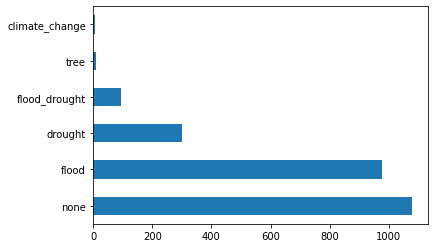

In [17]:
df_transformed['category'].value_counts().plot(kind='barh')

In [18]:
#Write the data to a CSV file
df_transformed.to_csv('news_article_data_transformed.csv', 
                      index=False)

## Preprocessing

In [19]:
import pandas as pd
import re, os
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk.corpus
import spacy
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [20]:
def cleaned_data(text):
    clean=re.sub("http\S+","",text)
    clean = clean.lower()
    clean=re.sub("@\S+","",clean)
    clean = re.sub('#', ' ', clean)
    clean = re.sub('&amp', ' ', clean)
    # clean = re.sub(':', ' ', clean)
    clean = re.sub('/', ' ', clean)
    clean = re.sub(r'\?{2,}', '?', clean)
    clean = re.sub(r'\!{2,}', '!', clean)
    clean = re.sub(r'\.{2,}', '.', clean)
    clean = re.sub('\[', '', clean)
    clean = re.sub('\]', '', clean)
    clean = re.sub(';', '', clean)
    clean = re.sub(r'[(]', ' ', clean)
    clean = re.sub(r'[)]', ' ', clean)
    clean = re.sub(r'@', ' ', clean)
    # clean = re.sub(r'/*', ' ', clean)
    clean = re.sub('-', ' ', clean)
    # clean = re.sub(r'([a-z])\1+', r'\1', clean)  # this is for bring character to once if it is repeating more than once
    # clean = re.sub('flod', 'flood', clean)
    # clean = re.sub('floding', 'flooding', clean)
    clean=re.sub('"'," ",clean)
    clean=re.sub("\s{2,}"," ",clean)
    clean=clean.strip()
    # clean = TextBlob(clean).correct()
    return clean
df_transformed['partially_cleaned'] = df_transformed['body'].apply(cleaned_data)
df_transformed.head()

,Id,title,source URL,body,time,keywords,category,country,data source,language,partially_cleaned
0,DR-2014-000109-CHN,Worst drought in 63 years hits Liaoning provin...,https://www.scmp.com/news/china/article/157349...,Liaoning averaged 90mm across the province in ...,2014-08-14 07:00:00+00:00,"['averaged', 'liaoning', 'hits', 'dry', 'droug...",drought,China,news article,English,liaoning averaged 90mm across the province in ...
1,DR-2014-000109-CHN,"In Time Of Drought, U.S. West's Alfalfa Export...",https://www.npr.org/2014/08/12/339753108/in-ti...,"In Time Of Drought, U.S. West's Alfalfa Export...",2014-08-12 07:00:00+00:00,"['criticized', 'river', 'drought', 'farmers', ...",drought,China,news article,English,"in time of drought, u.s. west's alfalfa export..."
2,DR-2014-000109-CHN,"More Chinese on the Coast, Less Fish in the Se...",https://www.scientificamerican.com/article/mor...,China's booming economic growth is helping to ...,2014-08-08 07:00:00+00:00,"['bertness', 'chinese', 'research', 'sea', 'ec...",none,China,news article,English,china's booming economic growth is helping to ...
3,DR-2014-000109-CHN,Climate change and drought in ancient times - ...,https://www.sciencedaily.com/releases/2014/08/...,The influence of climate on agriculture is bel...,2014-08-11 07:00:00+00:00,"['climate', 'drought', 'ancient', 'agriculture...",drought,China,news article,English,the influence of climate on agriculture is bel...
5,DR-2014-000109-CHN,California's severe drought unchanged despite ...,https://www.latimes.com/local/lanow/la-me-ln-r...,A series of thunderstorms that have hit Califo...,2014-08-07 07:00:00+00:00,"['drought', 'states', 'rain', 'despite', 'cali...",drought,China,news article,English,a series of thunderstorms that have hit califo...


In [21]:
!pip install contractions

     |████████████████████████████████| 327kB 6.8MB/s 
     |████████████████████████████████| 286kB 24.1MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85406 sha256=2d476ef6e319a48db75d4f72442301a78089451151e5bfbf5d9c142f7b3fa69a
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [22]:
import contractions

In [23]:
def expanded(text):
    expanded_words = []    
    try:
      for word in text.split():
        expanded_words.append(contractions.fix(word))
    except Exception:
      pass         
    expanded_text = ' '.join(expanded_words)
    return expanded_text

df_transformed['partially_cleaned'] = df_transformed['partially_cleaned'].apply(expanded)
df_transformed.head()

,Id,title,source URL,body,time,keywords,category,country,data source,language,partially_cleaned
0,DR-2014-000109-CHN,Worst drought in 63 years hits Liaoning provin...,https://www.scmp.com/news/china/article/157349...,Liaoning averaged 90mm across the province in ...,2014-08-14 07:00:00+00:00,"['averaged', 'liaoning', 'hits', 'dry', 'droug...",drought,China,news article,English,liaoning averaged 90mm across the province in ...
1,DR-2014-000109-CHN,"In Time Of Drought, U.S. West's Alfalfa Export...",https://www.npr.org/2014/08/12/339753108/in-ti...,"In Time Of Drought, U.S. West's Alfalfa Export...",2014-08-12 07:00:00+00:00,"['criticized', 'river', 'drought', 'farmers', ...",drought,China,news article,English,"in time of drought, you.s. west's alfalfa expo..."
2,DR-2014-000109-CHN,"More Chinese on the Coast, Less Fish in the Se...",https://www.scientificamerican.com/article/mor...,China's booming economic growth is helping to ...,2014-08-08 07:00:00+00:00,"['bertness', 'chinese', 'research', 'sea', 'ec...",none,China,news article,English,china's booming economic growth is helping to ...
3,DR-2014-000109-CHN,Climate change and drought in ancient times - ...,https://www.sciencedaily.com/releases/2014/08/...,The influence of climate on agriculture is bel...,2014-08-11 07:00:00+00:00,"['climate', 'drought', 'ancient', 'agriculture...",drought,China,news article,English,the influence of climate on agriculture is bel...
5,DR-2014-000109-CHN,California's severe drought unchanged despite ...,https://www.latimes.com/local/lanow/la-me-ln-r...,A series of thunderstorms that have hit Califo...,2014-08-07 07:00:00+00:00,"['drought', 'states', 'rain', 'despite', 'cali...",drought,China,news article,English,a series of thunderstorms that have hit califo...


In [24]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def final_pre_pro(text):
  clean = re.sub('\+','',text)
  clean = re.sub('=','',text)
  clean = re.sub('\_{2,}',' ',text)
  clean = re.sub('\*',' ',text)
  clean=re.sub("\s{2,}"," ",clean)
  return clean.strip()


df_transformed['cleaned body'] = df_transformed['partially_cleaned'].apply(remove_emojis)
df_transformed['cleaned body'] = df_transformed['cleaned body'].apply(final_pre_pro)
df_transformed.head(5)

,Id,title,source URL,body,time,keywords,category,country,data source,language,partially_cleaned,cleaned body
0,DR-2014-000109-CHN,Worst drought in 63 years hits Liaoning provin...,https://www.scmp.com/news/china/article/157349...,Liaoning averaged 90mm across the province in ...,2014-08-14 07:00:00+00:00,"['averaged', 'liaoning', 'hits', 'dry', 'droug...",drought,China,news article,English,liaoning averaged 90mm across the province in ...,liaoning averaged 90mm across the province in ...
1,DR-2014-000109-CHN,"In Time Of Drought, U.S. West's Alfalfa Export...",https://www.npr.org/2014/08/12/339753108/in-ti...,"In Time Of Drought, U.S. West's Alfalfa Export...",2014-08-12 07:00:00+00:00,"['criticized', 'river', 'drought', 'farmers', ...",drought,China,news article,English,"in time of drought, you.s. west's alfalfa expo...","in time of drought, you.s. west's alfalfa expo..."
2,DR-2014-000109-CHN,"More Chinese on the Coast, Less Fish in the Se...",https://www.scientificamerican.com/article/mor...,China's booming economic growth is helping to ...,2014-08-08 07:00:00+00:00,"['bertness', 'chinese', 'research', 'sea', 'ec...",none,China,news article,English,china's booming economic growth is helping to ...,china's booming economic growth is helping to ...
3,DR-2014-000109-CHN,Climate change and drought in ancient times - ...,https://www.sciencedaily.com/releases/2014/08/...,The influence of climate on agriculture is bel...,2014-08-11 07:00:00+00:00,"['climate', 'drought', 'ancient', 'agriculture...",drought,China,news article,English,the influence of climate on agriculture is bel...,the influence of climate on agriculture is bel...
5,DR-2014-000109-CHN,California's severe drought unchanged despite ...,https://www.latimes.com/local/lanow/la-me-ln-r...,A series of thunderstorms that have hit Califo...,2014-08-07 07:00:00+00:00,"['drought', 'states', 'rain', 'despite', 'cali...",drought,China,news article,English,a series of thunderstorms that have hit califo...,a series of thunderstorms that have hit califo...


In [25]:
del df_transformed['partially_cleaned']
df_transformed

,Id,title,source URL,body,time,keywords,category,country,data source,language,cleaned body
0,DR-2014-000109-CHN,Worst drought in 63 years hits Liaoning provin...,https://www.scmp.com/news/china/article/157349...,Liaoning averaged 90mm across the province in ...,2014-08-14 07:00:00+00:00,"['averaged', 'liaoning', 'hits', 'dry', 'droug...",drought,China,news article,English,liaoning averaged 90mm across the province in ...
1,DR-2014-000109-CHN,"In Time Of Drought, U.S. West's Alfalfa Export...",https://www.npr.org/2014/08/12/339753108/in-ti...,"In Time Of Drought, U.S. West's Alfalfa Export...",2014-08-12 07:00:00+00:00,"['criticized', 'river', 'drought', 'farmers', ...",drought,China,news article,English,"in time of drought, you.s. west's alfalfa expo..."
2,DR-2014-000109-CHN,"More Chinese on the Coast, Less Fish in the Se...",https://www.scientificamerican.com/article/mor...,China's booming economic growth is helping to ...,2014-08-08 07:00:00+00:00,"['bertness', 'chinese', 'research', 'sea', 'ec...",none,China,news article,English,china's booming economic growth is helping to ...
3,DR-2014-000109-CHN,Climate change and drought in ancient times - ...,https://www.sciencedaily.com/releases/2014/08/...,The influence of climate on agriculture is bel...,2014-08-11 07:00:00+00:00,"['climate', 'drought', 'ancient', 'agriculture...",drought,China,news article,English,the influence of climate on agriculture is bel...
5,DR-2014-000109-CHN,California's severe drought unchanged despite ...,https://www.latimes.com/local/lanow/la-me-ln-r...,A series of thunderstorms that have hit Califo...,2014-08-07 07:00:00+00:00,"['drought', 'states', 'rain', 'despite', 'cali...",drought,China,news article,English,a series of thunderstorms that have hit califo...
...,...,...,...,...,...,...,...,...,...,...,...
2345,FL-2017-000067-BRA,"01/21/2021 - Palm oil plantations, coal mines ...",https://news.mongabay.com/2021/01/palm-oil-pla...,Environmentalists have attributed recent heavy...,2021-01-20 08:00:00+00:00,"['palm', 'south', 'watershed', 'hectares', 'mi...",flood,Brazil,news article,English,environmentalists have attributed recent heavy...
2346,FL-2017-000067-BRA,Why is Brazil’s president beaming? Putin prais...,https://www.scmp.com/news/world/russia-central...,Russia's President Vladimir Putin with Brazil'...,2020-11-19 08:00:00+00:00,"['praises', 'bolsonaro', 'president', 'beams',...",none,Brazil,news article,English,russia's president vladimir putin with brazil'...
2347,FL-2017-000067-BRA,Container shortage delays shipments of Brazil'...,https://www.reuters.com/article/coffee-transpo...,NEW YORK (Reuters) - Coffee traders are strugg...,2020-10-13 07:00:00+00:00,"['delays', 'shipment', 'coffee', 'brazil', 'ma...",none,Brazil,news article,English,new york reuters coffee traders are struggling...
2348,FL-2017-000067-BRA,Brazil mining flood could devastate environmen...,https://www.reuters.com/article/us-brazil-damb...,"RIO DOCE, Brazil (Reuters) - The collapse of t...",2015-11-15 08:00:00+00:00,"['water', 'brazil', 'flood', 'environment', 'r...",none,Brazil,news article,English,"rio doce, brazil reuters the collapse of two d..."
